# Q2 DBSCAN

Given the dataset `DBSCAN.mat` with 500 2D points, you should apply DBSCAN algorithm to
cluster the dataset and find outliers as the following settings:

## Parameter Setting

1. Set $\epsilon$ = 5, Minpoints=5.
2. Set $\epsilon$ = 5, Minpoints=10
3. Set $\epsilon$ = 10, Minpoints=5.
4. Set $\epsilon$ = 10, Minpoints=10.

## Implementation

1. Draw a picture for your cluster results and outliers in each parameter setting in your report. For clearly, in each picture, the color of outliers should be **BLUE**.
2. Add a table to report how many clusters and outliers you find in each parameter setting in your report.
3. Discuss the results of different parameter settings, and report the best setting that you think and write your reason clearly.
4. Note that you are **NOT** allowed to use any existing DBSCAN library. You need to submit your code.

In [7]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [6]:
points = loadmat("DBSCAN.mat")["Points"]

In [82]:
class DBSCAN:
    def __init__(self, eps, min_points):
        self.eps = eps
        self.min_points = min_points
        
    def find_neigh(self, j, X):
        """
        Find all eps-neighborhood of point j
        """
        N = set()
        for p in range(X.shape[0]):
            # compute the Euclidean distance
            temp = np.sqrt(np.sum(np.square(X[j] - X[p])))
            if(temp <= self.eps):
                N.add(p)
        return N
    
    def fit(self, X):
        """
        Perform DBSCAN on data X
        
        Output: cluter, n_cluters, n_outliers
        """
        k = -1
        n_outliers = 0
        neigh_pts = set() # neighbor points
        ner_neighb_pts = set() # near neighbor points
        visited = set() # set of points that have been visited
        no_visit = list(range(len(X))) # list of points that not have been visited
        cluster = [-1] * len(X) # initialize clusters, all points are set to be outliers
        while len(no_visit) > 0:
            j = random.choice(no_visit)
            no_visit.remove(j)  # delete j point from no_visit list
            visited.add(j) # add the j point in visited set
            neigh_pts = self.find_neigh(j, X)
            if len(neigh_pts) < self.min_points:
                cluster[j] = -1 # the point is outlier (also represent color blue in the sequnce of colormap)
                n_outliers += 1
            else:
                k += 1
                cluster[j] = k
                for i in set(neigh_pts):
                    if i not in visited:
                        no_visit.remove(i)
                        visited.add(i)
                        ner_neigh_pts = self.find_neigh(i, X)
                        if len(ner_neigh_pts) >= self.min_points:
                            for a in ner_neigh_pts:
                                if a not in neigh_pts:
                                    neigh_pts.add(a)
                        if (cluster[i] == -1):
                            cluster[i] = k
        return cluster, (k+1), n_outliers

n_cluters = 72
n_outliers = 91


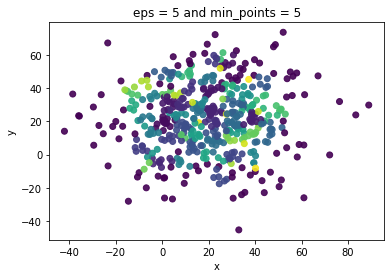

n_cluters = 34
n_outliers = 238


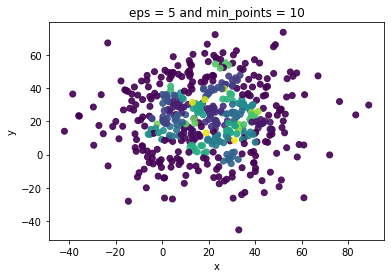

n_cluters = 37
n_outliers = 25


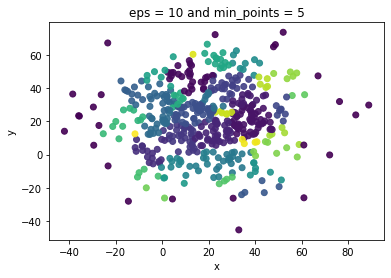

n_cluters = 29
n_outliers = 43


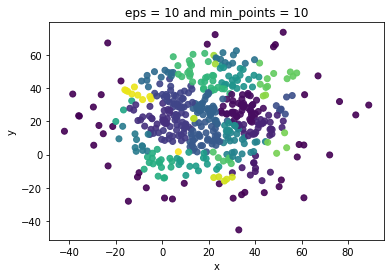

In [83]:
eps_list = [5, 10]
min_points_list = [5, 10]
for eps in eps_list:
    for min_points in min_points_list:
        # DBSCAN clustering
        clustering = DBSCAN(eps, min_points)
        pred_labels, n_clusters, n_outliers = clustering.fit(points)
        
        # compute the number of clusters and outliers
        print("n_cluters = %s" % n_clusters)
        print("n_outliers = %s" % n_outliers)
        
        # plot the clutering scatter
        area = np.pi * 4**2 
        plt.title("eps = %s and min_points = %s" %(eps, min_points))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter(points[:,0], points[:,1], c=pred_labels, alpha=0.9)
        plt.show()

From the figures above, we could see that the outliers are mainly distributed in the edge area, which shown in dark **BLUE**. When using parameters `eps = 10 and min_points = 5`, the clusters are clear and distinct with less number of outliers. If the parameters are set as `eps = 5 and min_points = 10`, the number of outliers are up to 238! Not very well.

The detailed results are shown in the table:

|eps    | min_points| n_clusters | n_outliers|
|-------|-----------|------------|-----------|
|5      | 5         | 72         | 91        |
|5      | 10        | 34         | 238       |
|10     | 5         | 37         | 25        |
|10     | 10        | 29         | 43        |